# Coding Part

One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

The challenge of this project is to make a model with maximum possible accuracy which predicts whether the car purchased at the Auction is a Kick (bad buy) or not.

## Contents:

The main steps of the explo-project are :
1. Importing main libraries
2. Data description.
3. Analysing the dataset
4. Exploratory data analysis and visualization
5. Splitting a dataset into Numeric and Categorical columns
6. Handling missing values in numeric columns
7. Scaling numeric features 
8. categorical Data
9. Encoding categorical columns
10. Splitting the dataset as train and test datasets
11. Model - 1 (Decision Tree)
12. Model - 2 (ANN)
13. Model - 3 (Random Forest)
14. Model - 4 (KNN)
15. Model - 5 (Logistic regression)
16. Picking the best model, saving the model to disk and loading it back.
17. Summary


## 1. Importing main libraries

> Let's start by installing and importing some important libraries..

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install pandas numpy matplotlib seaborn --quiet

You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install opendatasets scikit-learn --quiet 

You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


**upload files:**

* training.csv
* test1.csv
* test2.csv
* test3.csv
* Model_verif.csv

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
train_df = pd.read_csv('training.csv')

In [7]:
train_df.sample(10)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
68560,68592,0,8/26/2010,ADESA,2005,5,MITSUBISHI,ENDEAVOR FWD,LS,4D SPORT UTILITY LS,BLUE,AUTO,1.0,Alloy,85725,OTHER ASIAN,MEDIUM SUV,OTHER,6943.0,8041.0,10366.0,11452.0,7183.0,8547.0,10746.0,11941.0,NaN,NaN,3453,80817,CO,7275.0,0,594
3267,3270,0,11/4/2009,ADESA,2004,5,CHEVROLET,TRAILBLAZER 4WD 6C,Nor,4D SUV 4.2L LS,GREY,AUTO,1.0,Alloy,76217,AMERICAN,MEDIUM SUV,GM,6554.0,8177.0,7578.0,9331.0,6422.0,8032.0,10337.0,12125.0,NaN,NaN,20928,20166,VA,7295.0,0,1974
21436,21451,0,8/20/2010,OTHER,2004,6,CHEVROLET,1500 SILVERADO PICKU,Bas,REG CAB 4.3L,RED,AUTO,2.0,Covers,15655,AMERICAN,LARGE TRUCK,GM,4281.0,5752.0,8606.0,9835.0,3953.0,5318.0,7761.0,9057.0,NaN,NaN,99750,95673,CA,8200.0,0,822
42665,42689,0,10/28/2010,MANHEIM,2006,4,CHRYSLER,PT CRUISER,Tou,4D SEDAN,BLACK,AUTO,2.0,Covers,66723,AMERICAN,MEDIUM,CHRYSLER,4427.0,5513.0,7788.0,8826.0,4577.0,5482.0,7986.0,8781.0,NaN,NaN,17675,29532,SC,5080.0,0,1215
48216,48240,0,1/13/2009,OTHER,2003,6,DODGE,CARAVAN GRAND FWD V6,SE,MINIVAN 3.3L SE,WHITE,AUTO,2.0,Covers,88430,AMERICAN,VAN,CHRYSLER,3661.0,4520.0,4454.0,5382.0,2855.0,3622.0,3583.0,4412.0,NaN,NaN,18822,70401,LA,3800.0,0,2063
8201,8208,0,5/3/2010,MANHEIM,2008,2,CHEVROLET,IMPALA V6,LS,4D SEDAN LS 3.5L FFV,SILVER,AUTO,2.0,Covers,74564,AMERICAN,LARGE,GM,8230.0,9218.0,11729.0,12866.0,7813.0,8596.0,11314.0,12321.0,NaN,NaN,19638,27542,NC,8500.0,0,1974
29381,29402,0,12/18/2009,OTHER,2008,1,CHRYSLER,SEBRING 4C,LX,4D SEDAN LX,BLACK,AUTO,2.0,Covers,55331,AMERICAN,MEDIUM,CHRYSLER,7684.0,8299.0,11270.0,12088.0,8881.0,9497.0,12577.0,13109.0,NaN,NaN,99761,74135,OK,7200.0,0,920
52941,52969,0,10/21/2009,MANHEIM,2003,6,TOYOTA,CAMRY 4C 2.4L I4 EFI,LE,4D SEDAN LE,GREEN,AUTO,NaN,NaN,72590,TOP LINE ASIAN,MEDIUM,OTHER,6031.0,6997.0,7013.0,8057.0,6429.0,7347.0,7443.0,8435.0,NaN,NaN,17675,37122,TN,6970.0,0,869
69065,69097,1,3/6/2009,ADESA,2005,4,DODGE,CARAVAN FWD 4C 2.4L,SE,MINIVAN 2.4L SE,BLUE,AUTO,2.0,Covers,41017,AMERICAN,VAN,CHRYSLER,4336.0,5321.0,5183.0,6247.0,4503.0,5521.0,5363.0,6463.0,NaN,NaN,23359,91752,CA,5340.0,0,1116
11389,11398,0,3/29/2010,MANHEIM,2005,5,FORD,FREESTAR FWD V6,S,PASSENGER 3.9L,SILVER,AUTO,2.0,Covers,56231,AMERICAN,VAN,FORD,4297.0,5379.0,7781.0,8832.0,3457.0,4775.0,7352.0,8569.0,NaN,NaN,21973,27542,NC,6200.0,0,1169


In [7]:
train_df.shape

(72983, 34)

In [9]:
#Over view of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

## 2. Data Description

RefID -> Unique (sequential) number assigned to vehicles

IsBadBuy -> Identifies if the kicked vehicle was an avoidable purchase

PurchDate -> The Date the vehicle was Purchased at Auction

Auction -> Auction provider at which the vehicle was purchased

VehYear -> The manufacturer's year of the vehicle

VehicleAge -> The Years elapsed since the manufacturer's year

Make -> Vehicle Manufacturer

Model -> Vehicle Model

Trim -> Vehicle Trim Level

SubModel -> Vehicle Submodel

Color -> Vehicle Color Transmission -> Vehicles transmission type (Automatic, Manual)

WheelTypeID -> The type id of the vehicle wheel

WheelType -> The vehicle wheel type description (Alloy, Covers)

VehOdo -> The vehicles odometer reading

Nationality -> The Manufacturer's country

Size -> The size category of the vehicle (Compact, SUV, etc.)

TopThreeAmericanName -> Identifies if the manufacturer is one of the top three American manufacturers MMRAcquisitionAuctionAveragePrice -> Acquisition price for this vehicle in average condition at time of purchase

MMRAcquisitionAuctionCleanPrice -> Acquisition price for this vehicle in the above Average condition at time of purchase

MMRAcquisitionRetailAveragePrice -> Acquisition price for this vehicle in the retail market in average condition at time of purchase

MMRAcquisitonRetailCleanPrice -> Acquisition price for this vehicle in the retail market in above average condition at time of purchase

MMRCurrentAuctionAveragePrice -> Acquisition price for this vehicle in average condition as of current day

MMRCurrentAuctionCleanPrice -> Acquisition price for this vehicle in the above condition as of current day

MMRCurrentRetailAveragePrice -> Acquisition price for this vehicle in the retail market in average condition as of current day

MMRCurrentRetailCleanPrice -> Acquisition price for this vehicle in the retail market in above average condition as of current day

PRIMEUNIT -> Identifies if the vehicle would have a higher demand than a standard purchase

AcquisitionType -> Identifies how the vehicle was aquired (Auction buy, trade in, etc)

AUCGUART -> The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)

KickDate -> Date the vehicle was kicked back to the auction BYRNO -> Unique number assigned to the buyer that purchased the vehicle

VNZIP -> Zipcode where the car was purchased

VNST -> State where the the car was purchased

VehBCost -> Acquisition cost paid for the vehicle at time of purchase

IsOnlineSale -> Identifies if the vehicle was originally purchased online

WarrantyCost -> Warranty price (term=36month and millage=36K)

> PurchDate (Date of Purchase of car from auction) won't be any help in predicting if the car was a good or bad buy.
Similarly we don't have any use of RefId Column.
Also, BYRNO i.e. Unique number assigned to each buyer in auction is not useful as the buyer won't affect the quality of car.

## 3. Analysing the dataset

In [10]:
#Dropping the columns which don't co-relate to target column. 
train_df.drop(columns=["RefId", "PurchDate", "BYRNO"], inplace = True)

> The price diff at a above average conditioned vehicle won't be a much needed

In [22]:
train_df.drop(columns=["MMRCurrentRetailCleanPrice","MMRCurrentAuctionCleanPrice","MMRAcquisitionAuctionCleanPrice","MMRAcquisitonRetailCleanPrice"],inplace=True)

In [11]:
train_df.shape

(72983, 27)

> lets see how much the auction price and retail price differs by..

In [11]:
train_df["pricediff_before"]=train_df["MMRAcquisitionAuctionAveragePrice"]-train_df["MMRAcquisitionRetailAveragePrice"]
train_df["pricediff_after"]=train_df["MMRCurrentAuctionAveragePrice"]-train_df["MMRCurrentRetailAveragePrice"]
train_df.drop(columns=["MMRAcquisitionAuctionAveragePrice","MMRAcquisitionRetailAveragePrice","MMRCurrentAuctionAveragePrice","MMRCurrentRetailAveragePrice"],inplace=True)

## 4.  Exploratory data analysis and visualization

### Visualizating Correlations


#### Correlation:

*Correlation, statistical technique which determines how one variables moves/changes in relation with the other variable. It gives us the idea about the degree of the relationship of the two variables. It’s a bi-variate analysis measure which describes the association between different variables.*

> Correlation explains how one or more variables are related to each other. These variables can be input data features which have been used to forecast our target variable.

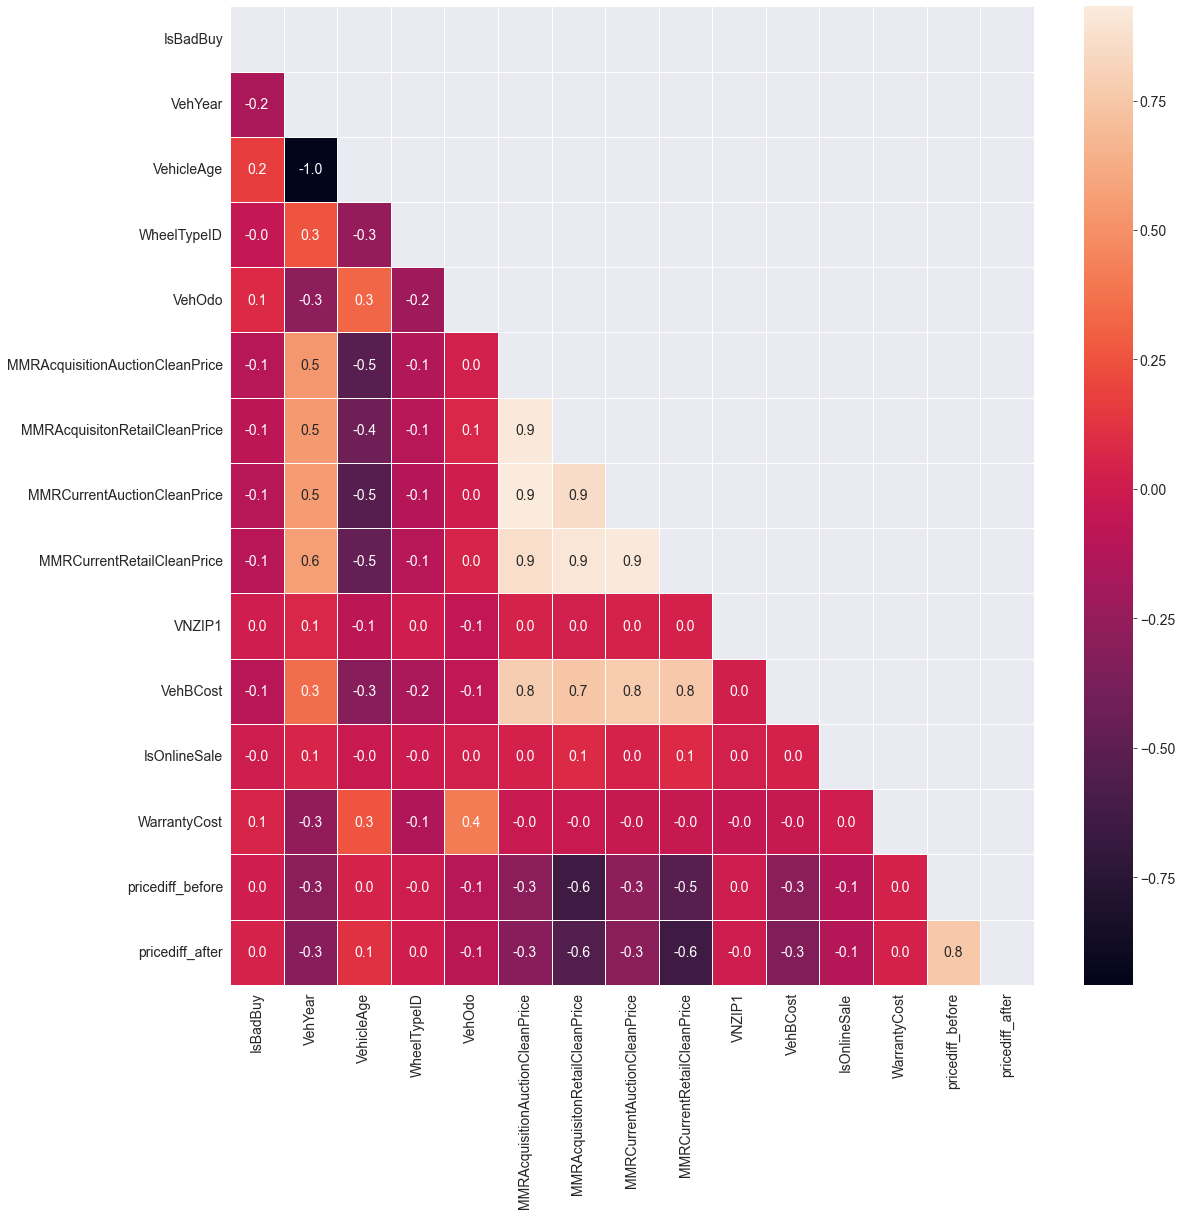

In [12]:
# Plotting a heat map to visualize correlations
plt.figure(figsize=(18, 18))
matrix = np.triu(train_df.corr())
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, fmt= '.1f', mask=matrix)
plt.show()

> From above figure we can see that VNZIP1 and WheelTypeID have no correlation with our target IsBadBuy. So we can safely drop them.



In [13]:
#Dropping VNZIP1 and WheelTypeID because of their zero correlation with the target column(IsBadBuy)
train_df.drop(columns = ["VNZIP1", "WheelTypeID",], inplace = True)

In [15]:
train_df.shape

(72983, 23)

**Now let's see relation between various columns by plotting various types of visualizations.**

##### **Let's define a function which takes input a column and caluculates the percentage of badbuys correelated with that column**

In [14]:
def percentage_df(column):
    make_list = train_df[column].unique()
    make_list
    badbuys = train_df[[column,'IsBadBuy']]
    badbuys

    d = dict()
    for i in make_list:
        not_bad_buys =len(badbuys[(badbuys[column]== i) & (badbuys['IsBadBuy']==0)])
        bad_buys = len(badbuys[(badbuys[column]== i) & (badbuys['IsBadBuy']==1)])
        total_buys = bad_buys+not_bad_buys
        try:
            bad_buys_percentage = (bad_buys/total_buys)*100
            d[i] = bad_buys_percentage
        except:
            continue
    df = pd.DataFrame(list(d.items()),columns = [column,'percentage_of_bad_buys'])
    sorted_df = df.sort_values('percentage_of_bad_buys',ascending = False)
#function returns a dataframe which is sorted based on percentage of badbuys
    return sorted_df

### VehYear ,vehicle age vs Sales

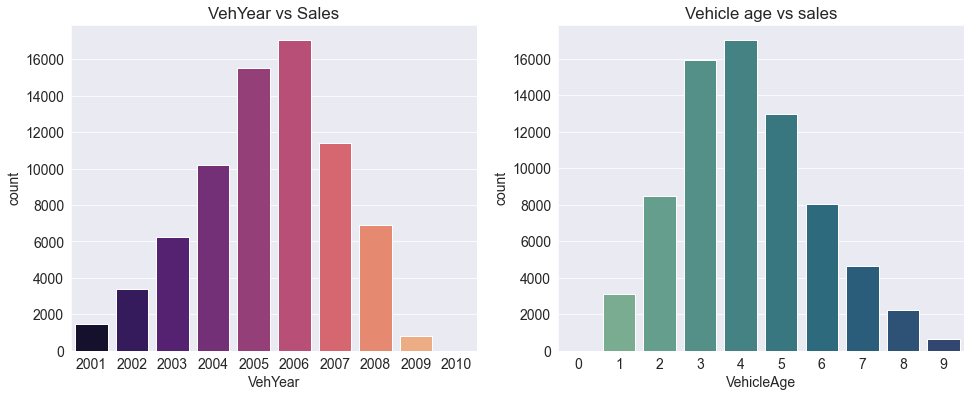

In [15]:
matplotlib.rcParams['figure.figsize'] = (16, 6)

plt.subplot(1,2,1)
plt.title('VehYear vs Sales')
plt.ylabel('Sales')
sns.countplot(x = "VehYear" ,data = train_df,palette = 'magma');

plt.subplot(1,2,2)
plt.title('Vehicle age vs sales')
plt.ylabel('Sales')
sns.countplot(x = 'VehicleAge', data = train_df,palette = 'crest');

 These graphs seems very interesting..from these graphs we can understand the psycology of dealers in the auction.

* One scenario is the decrease in sales after 2006 is due to the maximum resales in 2006, we can assume that there is less demand of new cars that and that is impacted in further years. 

* Let's assume the data was recorded in 2010.., the vehicles with 4 years implies those cars which were manufactured in 2006 and have maximum number of sales and as the age decreases the sales decreased since there will definetely be a boost in the condition of the car and obviously the price increases.

* And with increase in age (vehicles which were manufactured before 2006) there may be a downturn in condition and this might be the reason for decrease in sales as the vehicle age increases.

* Therefore for dealers choose optimum vehicles are those with age `4` and next `3` years.

Now let's see the percentage of badbuys vs vehicleage and manufactured year..

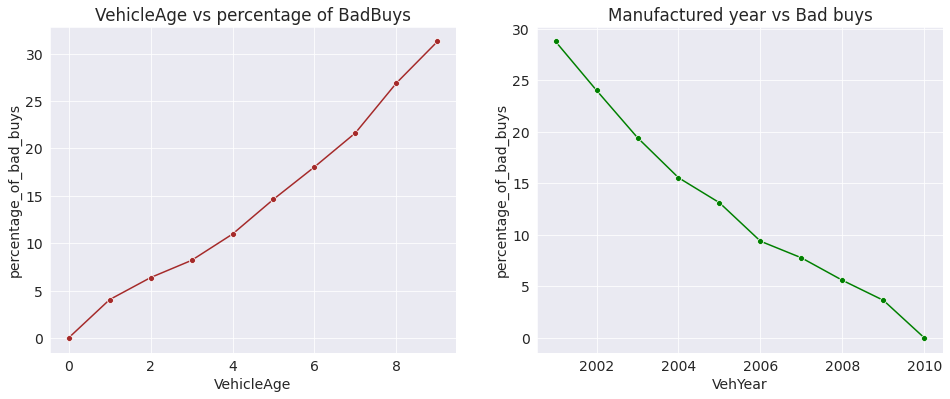

In [18]:
age_df = percentage_df('VehicleAge')
plt.subplot(1, 2, 1)
plt.title('VehicleAge vs percentage of BadBuys')
sns.lineplot(y ='percentage_of_bad_buys',x='VehicleAge',data= age_df,color = 'brown', marker = 'o');


year_df = percentage_df('VehYear')
plt.subplot(1,2,2)
plt.title("Manufactured year vs Bad buys")
sns.lineplot(y = 'percentage_of_bad_buys', x = 'VehYear', data = year_df, color = 'green', marker = 'o');

> Sales, manufacturing in 2002, 2006,2009.

A car is considered a bad buy if it is not worth the price he bought it, which means the customer is not satisfied with the condition for the price he bought it. The condition of the car definitely lowers as the age increases(since usage increases). And some of these cars are sold at higherprice than retail price.

### Color vs Total Sales and perccentage of badbuys

In [19]:
colors = list(train_df['Color'].unique())
colors.pop()
colors

['RED',
 'WHITE',
 'MAROON',
 'SILVER',
 'BLACK',
 'GOLD',
 'GREY',
 'BLUE',
 'BEIGE',
 'PURPLE',
 'ORANGE',
 'GREEN',
 'BROWN',
 'YELLOW',
 'NOT AVAIL',
 'OTHER']

In [20]:
badbuys = []
sales = []
badbuys_percentage = []
for i in colors:
    b = (train_df.loc[((train_df['Color'] == i) & (train_df['IsBadBuy'] == 1))]).shape[0]
    s = (train_df.loc[((train_df['Color'] == i))]).shape[0]
    sales.append(s)
    badbuys.append(b)
    badbuys_percentage.append((b/s)*100)
dict_ = {'color' : colors,'Total Sales' : sales, 'Badbuys' : badbuys,'Percentage of badbuys' : badbuys_percentage}

df = pd.DataFrame(dict_)
df

,color,Total Sales,Badbuys,Percentage of badbuys
0,RED,6257,825,13.185233
1,WHITE,12123,1506,12.422668
2,MAROON,2046,260,12.707722
3,SILVER,14875,1843,12.389916
4,BLACK,7627,858,11.249508
5,GOLD,5231,737,14.089084
6,GREY,7887,911,11.550653
7,BLUE,10347,1189,11.491254
8,BEIGE,1584,211,13.320707
9,PURPLE,373,56,15.013405


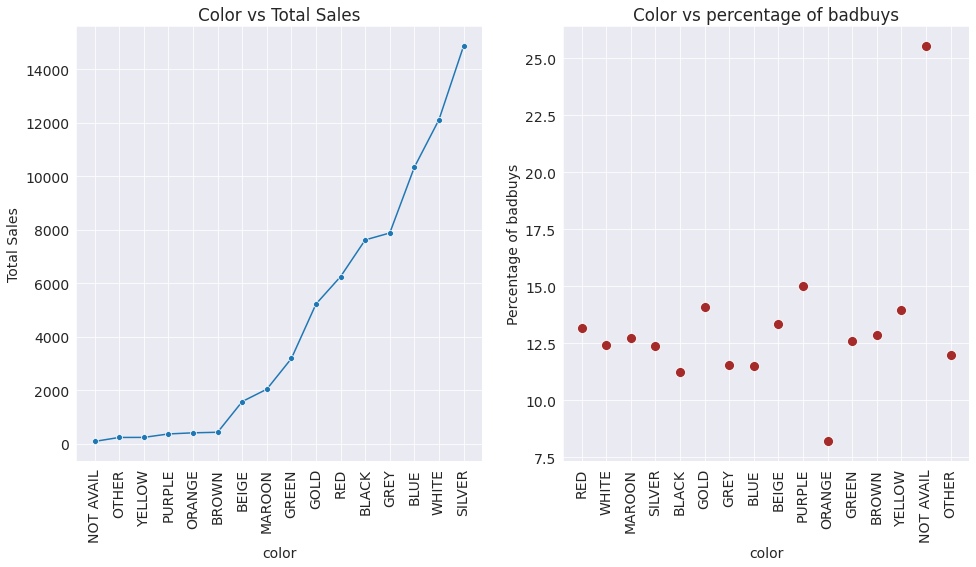

In [21]:
matplotlib.rcParams['figure.figsize'] = (16, 8)
plt.subplot(1,2,1)
plt.title('Color vs Total Sales')
plt.xticks(rotation = 90)
sns.lineplot(y ='Total Sales',x='color',data= df.sort_values(by = 'Total Sales'),palette = 'PuBuGn_d', marker = 'o');

plt.subplot(1,2,2)
plt.title('Color vs percentage of badbuys')
plt.xticks(rotation = 90)
sns.scatterplot(y ='Percentage of badbuys',x='color',data= df,color = 'brown', marker = 'o',s=100);

> Ok.., the first graph is clear.

> Seems like color has least or no correlation with the percentage of badbuys, almost all colors have similar nnumber of badbuys, out of these orange has least percentage of badbuys.

### Auction vs IsBadBuy

In [22]:
auction_df = percentage_df('Auction')
auction_df

,Auction,percentage_of_bad_buys
0,ADESA,15.188032
1,OTHER,11.816468
2,MANHEIM,11.487952


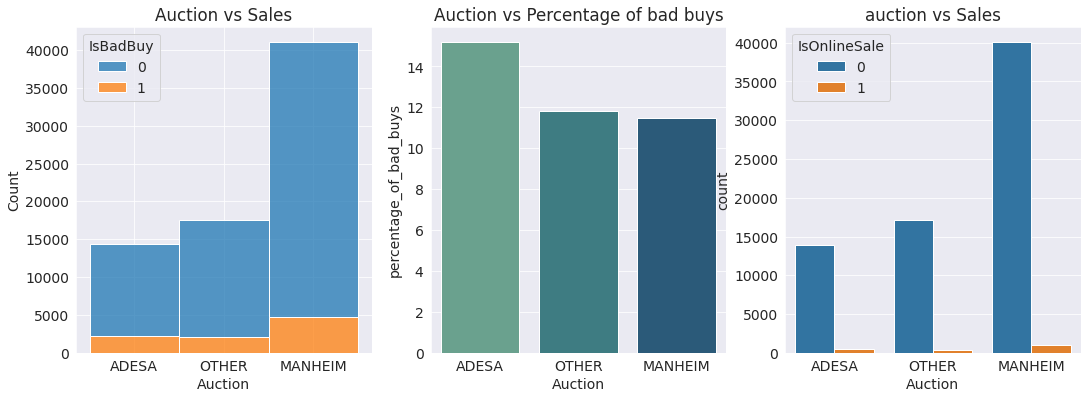

In [23]:
matplotlib.rcParams['figure.figsize'] = (18, 6)
plt.subplot(1, 3, 1)
plt.title('Auction vs Sales')
sns.histplot(x = "Auction", data = train_df, hue = "IsBadBuy", multiple = 'stack');


plt.subplot(1,3,2)
plt.title('Auction vs Percentage of bad buys')
sns.barplot(x = 'Auction',y ='percentage_of_bad_buys', data = auction_df,palette = 'crest');



plt.subplot(1,3,3)
plt.title('auction vs Sales')
sns.countplot(x = 'Auction',data = train_df,hue = 'IsOnlineSale');

> The `MANHEIM` is most prefered because it has more number of sales and least percentage of badbuys on the other side `ADESA` auction has least sales and out of these it has more badbuys. Therefore it is better to buy at  `MANHEIM`. 

### Make vs IsBadBuy

In [24]:
make_vs_badbuyper_df = percentage_df('Make')
make_vs_badbuyper_df

,Make,percentage_of_bad_buys
28,PLYMOUTH,50.000000
29,LEXUS,35.483871
27,INFINITI,33.333333
23,MINI,33.333333
22,LINCOLN,29.896907
30,ACURA,27.272727
24,SUBARU,21.428571
17,OLDSMOBILE,20.164609
10,MERCURY,16.976999
0,MAZDA,16.138917


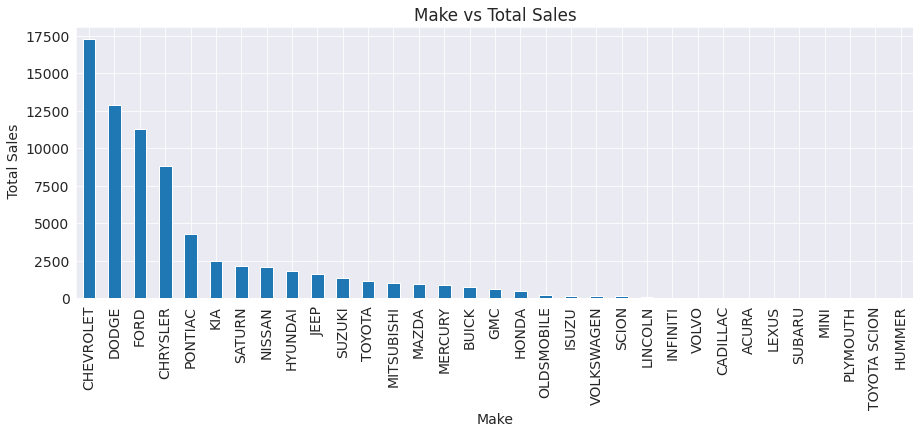

In [25]:
plt.figure(figsize=(15, 5))
plt.title('Make vs Total Sales')
plt.xlabel('Make')
plt.ylabel(' Total Sales')
train_df['Make'].value_counts().plot(kind="bar");

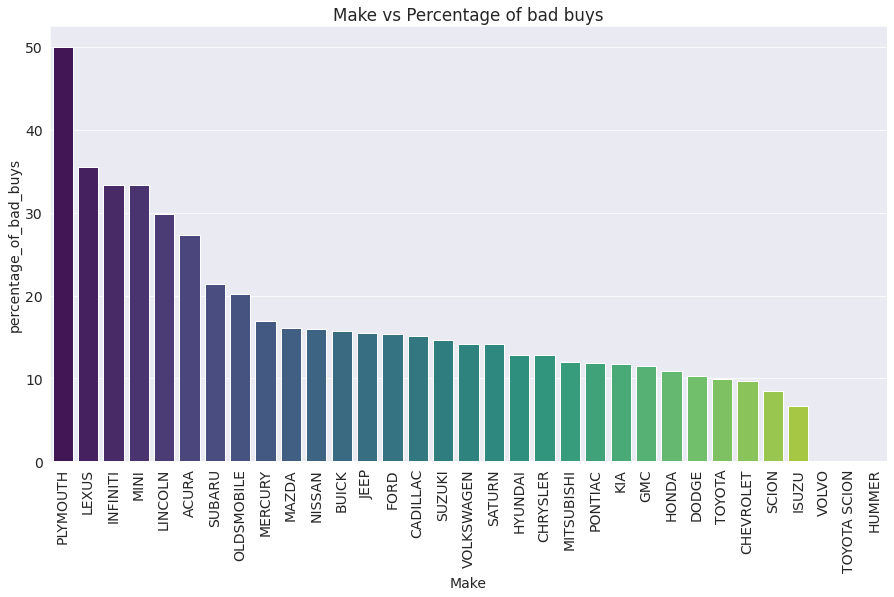

In [26]:
make_vs_badbuyper_df = percentage_df('Make')
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
plt.title('Make vs Percentage of bad buys')
plt.xticks(rotation = 90)
sns.barplot(y ='percentage_of_bad_buys',x='Make',data= make_vs_badbuyper_df,palette = 'viridis' );

### Nationality vs Badbuy

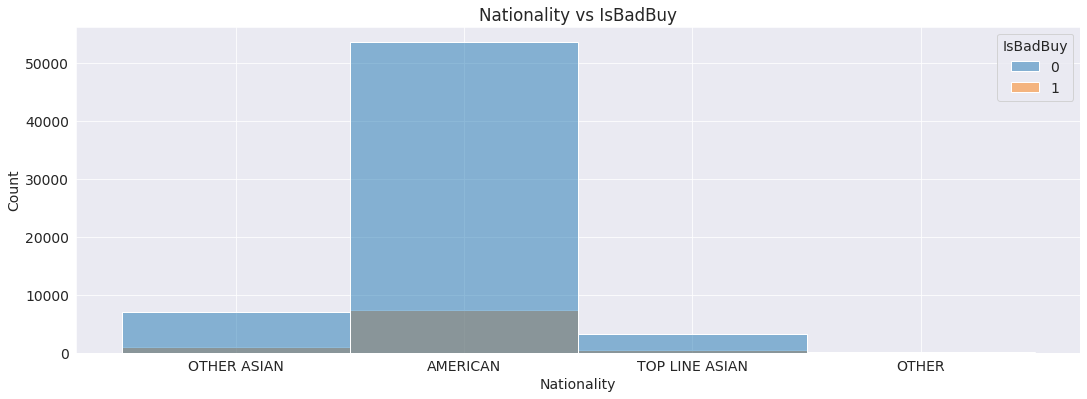

In [27]:
plt.title('Nationality vs IsBadBuy')
sns.histplot(x = "Nationality",data = train_df, hue = "IsBadBuy");

In [28]:

nationality_per_df = percentage_df('Nationality')
nationality_per_df

,Nationality,percentage_of_bad_buys
3,OTHER,13.846154
2,TOP LINE ASIAN,13.460505
0,OTHER ASIAN,13.208017
1,AMERICAN,12.104280


> Above values indicate percentage of badbuy in different nations. Almost all nations have similar percentage of badbuys.

### Size vs total sales and percentage of badbuys


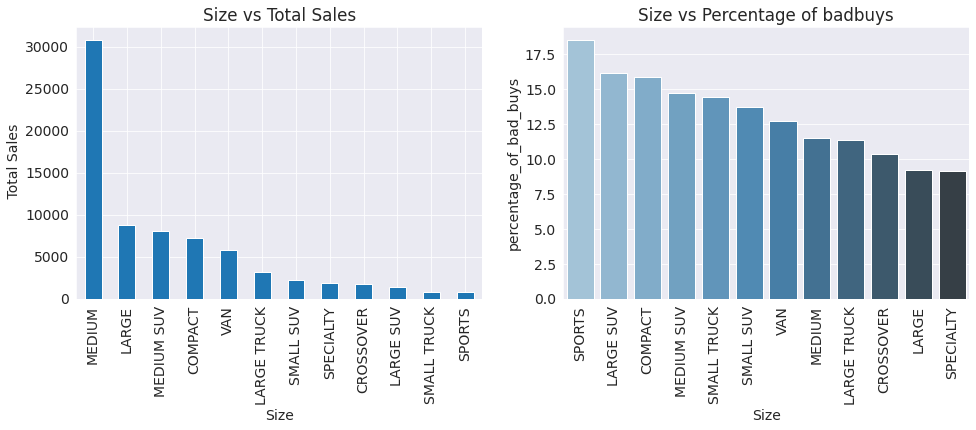

In [29]:
matplotlib.rcParams['figure.figsize'] = (16, 5)


plt.subplot(1,2,1)
plt.title('Size vs Total Sales')
plt.xlabel('Size')
plt.ylabel(' Total Sales')
train_df['Size'].value_counts().plot(kind="bar");


size_per_df = percentage_df('Size')
plt.subplot(1,2,2)
plt.title('Size vs Percentage of badbuys')
plt.xticks(rotation = 90)
sns.barplot(y ='percentage_of_bad_buys',x='Size',data= size_per_df,palette = 'Blues_d' );

* Medium sized cars have maximum sales. Implies many dealers prefer medium sized cars (Even many customers prefer medium sized cars).
* While the sports car with minimum number of sales has maximum number percentage of badbuys. Even though the percentage is small, it can be considered significant when compared to other cars of different sizes. Therefore someone need to think many times while buying a second hand sports car.

In [30]:
size_per_df

,Size,percentage_of_bad_buys
8,SPORTS,18.532819
6,LARGE SUV,16.189812
2,COMPACT,15.891742
5,MEDIUM SUV,14.746601
11,SMALL TRUCK,14.467593
10,SMALL SUV,13.752197
4,VAN,12.743423
0,MEDIUM,11.502355
1,LARGE TRUCK,11.356467
9,CROSSOVER,10.403638


### Prefered wheel type

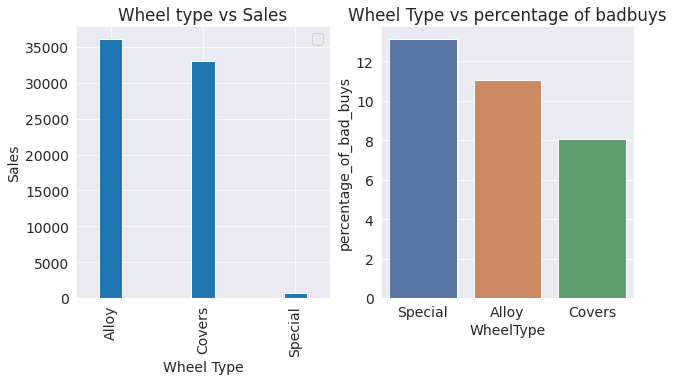

In [31]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.subplot(1,2,1)
size_per_df = percentage_df('Size')
plt.title('Wheel type vs Sales')
plt.xlabel('Wheel Type')
plt.ylabel('Sales')
plt.legend(train_df['IsBadBuy'])
train_df['WheelType'].value_counts().plot(kind = 'bar',width = 0.25);

wheeltype_per_df = percentage_df('WheelType')
plt.subplot(1,2,2)
plt.title('Wheel Type vs percentage of badbuys')
sns.barplot(y ='percentage_of_bad_buys',x='WheelType',data= wheeltype_per_df,palette = 'deep');

### Missing values

> Let's see the percentage of missing values in each column..

In [32]:
train_df.isna().sum()*100 / len(train_df)

IsBadBuy                 0.000000
Auction                  0.000000
VehYear                  0.000000
VehicleAge               0.000000
Make                     0.000000
Model                    0.000000
Trim                     3.233630
SubModel                 0.010961
Color                    0.010961
Transmission             0.012332
WheelType                4.348958
VehOdo                   0.000000
Nationality              0.006851
Size                     0.006851
TopThreeAmericanName     0.006851
PRIMEUNIT               95.315347
AUCGUART                95.315347
VNST                     0.000000
VehBCost                 0.000000
IsOnlineSale             0.000000
WarrantyCost             0.000000
pricediff_before         0.024663
pricediff_after          0.431607
dtype: float64

> Though `PRIMEUNIT and AUCGUART` has 95% of missing values .. these columns posses special value .
Since TopThreeAmericanName column can't give much information about quality of the car, let's just drop these columns

In [16]:
train_df.drop(columns = [ "TopThreeAmericanName"], inplace = True)

## 5.Splitting a dataset into Numeric and Categorical columns

> **Let's separate the columns in training dataset on the basis of dtypes as numeric columns and categorical columns.**

In [24]:
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes('object').columns.tolist()

In [25]:
numeric_cols

['IsBadBuy',
 'VehYear',
 'VehicleAge',
 'VehOdo',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'pricediff_before',
 'pricediff_after']

## 6. Handling missing values in numeric columns

### Inputing missing values

####  Imputation of Data:
    
   This is a technique of filling up or imputing all the missing values with suitable substitute. There are four strategies of filling up these missing values. This substitute can be either mean, median or mode or some constant. `Sklearn` provides a module `SimpleImputer` that can be used to apply all the four imputing strategies for missing data that we discussed above. Here, we will fill all the missing values or Nan values with averages/mean of respective columns.`


> Now let's inpute the missinig values by importing `SimpleImputer` from `sklearn.impute`.



In [19]:
from sklearn.impute import SimpleImputer

In [26]:
#Here we will use mean strategy to impute the missing values of each column.
imputer = SimpleImputer(strategy = 'mean')

In [27]:
train_df[numeric_cols].isna().sum()

IsBadBuy              0
VehYear               0
VehicleAge            0
VehOdo                0
VehBCost              0
IsOnlineSale          0
WarrantyCost          0
pricediff_before     18
pricediff_after     315
dtype: int64

In [28]:
imputer.fit(train_df[numeric_cols])

SimpleImputer()

> After calling fit, the computed statistic for each column is stored in the statistics_ property of imputer.

In [29]:
list(imputer.statistics_)

[0.12298754504473644,
 2005.3430524916762,
 4.176643875971116,
 71499.99591685736,
 6730.934326212955,
 0.025279859693353248,
 1276.580984612855,
 -2368.1251147810594,
 -2643.6420432652612]

> The missing values in the training and test sets can now be filled in using the transform method of imputer.

In [30]:
train_df[numeric_cols] = imputer.transform(train_df[numeric_cols])

In [31]:
train_df[numeric_cols].isna().sum()

IsBadBuy            0
VehYear             0
VehicleAge          0
VehOdo              0
VehBCost            0
IsOnlineSale        0
WarrantyCost        0
pricediff_before    0
pricediff_after     0
dtype: int64

## 7. Scaling Numeric Features

In [32]:
train_df[numeric_cols].describe()

,IsBadBuy,VehYear,VehicleAge,VehOdo,VehBCost,IsOnlineSale,WarrantyCost,pricediff_before,pricediff_after
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.122988,2005.343052,4.176644,71499.995917,6730.934326,0.025280,1276.580985,-2368.125115,-2643.642043
std,0.328425,1.731252,1.712210,14578.913128,1767.846435,0.156975,598.846788,1369.028057,1304.305836
min,0.000000,2001.000000,0.000000,4825.000000,1.000000,0.000000,462.000000,-7731.000000,-7460.000000
25%,0.000000,2004.000000,3.000000,61837.000000,5435.000000,0.000000,837.000000,-3565.000000,-3644.000000
50%,0.000000,2005.000000,4.000000,73361.000000,6700.000000,0.000000,1155.000000,-2851.000000,-3161.000000
75%,0.000000,2007.000000,5.000000,82436.000000,7900.000000,0.000000,1623.000000,-983.000000,-1084.000000
max,1.000000,2010.000000,9.000000,115717.000000,45469.000000,1.000000,7498.000000,0.000000,40.000000


> Since the parameters will be in different ranges, scaling is done so that one parameter doesn't effect other parameter. 
`Let's use MinMaxScaler from sklearn.preprocessing to scale values to the ( 0 , 1 ) range.`

#### MinMax Scaler

`MinMax Scaler` is one of the most popular scaling algorithms. It transforms features by scaling each feature to a given range, which is generally `[0,1]`, or `[-1,-1] in case of negative values.`
For each feature, the MinMax Scaler follows the formula:

> `((xi) - min(x))/(max(x)-min(x))`

It subtracts the min of the column from each value and then divides by the range, i.e, max(x)-min(x).

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

> IsBadBuy is the output column . so we shouldn't scale that column

In [35]:
req_col=numeric_cols[1:].copy()

In [36]:
req_col

['VehYear',
 'VehicleAge',
 'VehOdo',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'pricediff_before',
 'pricediff_after']

In [37]:
scaler.fit(train_df[req_col])

MinMaxScaler()

In [38]:
train_df[req_col] = scaler.transform(train_df[req_col])

## 8. Categorical Data

### Auction

In [39]:
categorical_cols

['Auction',
 'Make',
 'Model',
 'Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelType',
 'Nationality',
 'Size',
 'PRIMEUNIT',
 'AUCGUART',
 'VNST']

In [40]:
train_df[categorical_cols].Auction.nunique()

3

In [41]:
train_df[categorical_cols].Auction.unique()

array(['ADESA', 'OTHER', 'MANHEIM'], dtype=object)

### PrimeUnit

In [42]:
train_df.PRIMEUNIT.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [43]:
train_df.PRIMEUNIT = train_df.PRIMEUNIT.fillna("other")

> Primeunit is a special aspect given to some special vehicles to increase their worth , so we should it into consideration by changing all nan to others

In [44]:
train_df.PRIMEUNIT.unique()

array(['other', 'NO', 'YES'], dtype=object)

### AUCGUART

In [45]:
train_df.AUCGUART.unique()

array([nan, 'GREEN', 'RED'], dtype=object)

In [46]:
train_df.AUCGUART=train_df.AUCGUART.fillna("other")

In [47]:
train_df.AUCGUART.unique()

array(['other', 'GREEN', 'RED'], dtype=object)

### Make

In [48]:
train_df[categorical_cols].Make.nunique()

33

In [49]:
train_df[categorical_cols].Make.unique()

array(['MAZDA', 'DODGE', 'FORD', 'MITSUBISHI', 'KIA', 'GMC', 'NISSAN',
       'CHEVROLET', 'SATURN', 'CHRYSLER', 'MERCURY', 'HYUNDAI', 'TOYOTA',
       'PONTIAC', 'SUZUKI', 'JEEP', 'HONDA', 'OLDSMOBILE', 'BUICK',
       'SCION', 'VOLKSWAGEN', 'ISUZU', 'LINCOLN', 'MINI', 'SUBARU',
       'CADILLAC', 'VOLVO', 'INFINITI', 'PLYMOUTH', 'LEXUS', 'ACURA',
       'TOYOTA SCION', 'HUMMER'], dtype=object)

### Model

In [50]:
train_df[categorical_cols].Model.nunique()

1063

*As this column contains much many unique vales .. they add too many columns while encoding which bring some effects on the model .. so lets drop it and submodel too*

In [51]:
train_df.drop(columns=["Model","SubModel"],inplace=True)
categorical_cols.remove("Model")

In [52]:
categorical_cols.remove("SubModel")

### Transmission

In [53]:
train_df[categorical_cols].Transmission.nunique()

3

In [54]:
train_df[categorical_cols].Transmission.unique()

array(['AUTO', 'MANUAL', nan, 'Manual'], dtype=object)

> Let's drop the rows with nan values and correct the naming error in Manual to MANUAL.

In [55]:
train_df.Transmission.replace(to_replace='Manual', value = "MANUAL", inplace = True)

In [56]:
train_df.dropna(subset=['Transmission'],inplace = True)

In [57]:
train_df[categorical_cols].Transmission.unique()

array(['AUTO', 'MANUAL'], dtype=object)

### Nationality

In [58]:
train_df[categorical_cols].Nationality.nunique()

4

In [59]:
train_df[categorical_cols].Nationality.unique()

array(['OTHER ASIAN', 'AMERICAN', 'TOP LINE ASIAN', 'OTHER', nan],
      dtype=object)

> *Let's merge OTHER ASIAN and TOP LINE ASIAN into a single ASIAN category. This will make more sense.*

In [60]:
train_df.Nationality.replace(to_replace=["OTHER ASIAN", "TOP LINE ASIAN"], value = "ASIAN", inplace = True)

In [61]:
train_df.dropna(subset = ['Nationality'],inplace = True)

In [62]:
train_df.Nationality.unique()

array(['ASIAN', 'AMERICAN', 'OTHER'], dtype=object)

### Size

In [63]:
train_df[categorical_cols].Size.nunique()

12

In [64]:
train_df[categorical_cols].Size.unique()

array(['MEDIUM', 'LARGE TRUCK', 'COMPACT', 'LARGE', 'VAN', 'MEDIUM SUV',
       'LARGE SUV', 'SPECIALTY', 'SPORTS', 'CROSSOVER', 'SMALL SUV',
       'SMALL TRUCK'], dtype=object)

### VNST

In [65]:
train_df[categorical_cols].VNST.nunique()

37

In [66]:
train_df[categorical_cols].VNST.unique()

array(['FL', 'VA', 'IA', 'AR', 'MN', 'TN', 'PA', 'OH', 'AL', 'MI', 'TX',
       'IL', 'MA', 'AZ', 'GA', 'NC', 'MD', 'CA', 'UT', 'OR', 'SC', 'CO',
       'ID', 'NV', 'WV', 'MS', 'OK', 'NM', 'LA', 'IN', 'MO', 'WA', 'NH',
       'NJ', 'NY', 'NE', 'KY'], dtype=object)

In [67]:
col=list(train_df.columns)
for ele in col:
  print(train_df[ele].unique())

[0. 1.]
['ADESA' 'OTHER' 'MANHEIM']
[0.55555556 0.33333333 0.44444444 0.66666667 0.         0.22222222
 0.11111111 0.77777778 0.88888889 1.        ]
[0.33333333 0.55555556 0.44444444 0.22222222 0.88888889 0.66666667
 0.77777778 1.         0.11111111 0.        ]
['MAZDA' 'DODGE' 'FORD' 'MITSUBISHI' 'KIA' 'GMC' 'NISSAN' 'CHEVROLET'
 'SATURN' 'CHRYSLER' 'MERCURY' 'HYUNDAI' 'TOYOTA' 'PONTIAC' 'SUZUKI'
 'JEEP' 'HONDA' 'OLDSMOBILE' 'BUICK' 'SCION' 'VOLKSWAGEN' 'ISUZU'
 'LINCOLN' 'MINI' 'SUBARU' 'CADILLAC' 'VOLVO' 'INFINITI' 'PLYMOUTH'
 'LEXUS' 'ACURA' 'TOYOTA SCION' 'HUMMER']
['i' 'ST' 'SXT' 'ZX3' 'ES' 'EX' 'SE' 'SEL' 'SLE' 'XL' 'Bas' 'LS' nan 'SS'
 'SLT' '150' 'Spo' 'LX' 'GLS' 'CE' 'GT' 'Lar' '2' 'Adv' 'SR5' 'GXP' 'Tou'
 'XLT' 'LT' 'SES' 'XLS' 'GL' 'LE' '1' 'L20' 'Lim' 's' 'Edd' '3' 'Edg'
 'ZTW' 'ZX4' 'STX' 'CX' 'Nor' 'GS' 'XE' 'CXL' 'Ren' 'LTZ' 'ZTS' 'S' 'GTC'
 'GTP' 'Cla' 'Spy' 'LXi' 'SE-' 'Exe' 'Pre' 'SL2' 'GXE' 'SL1' 'Cus' 'GLE'
 'DE' 'Z71' 'Si' 'X' 'SX' 'XR' 'SVT' 'GTS' 'LW3' 'SV6' 'Va

### Trim

In [68]:
train_df["Trim"].unique()

array(['i', 'ST', 'SXT', 'ZX3', 'ES', 'EX', 'SE', 'SEL', 'SLE', 'XL',
       'Bas', 'LS', nan, 'SS', 'SLT', '150', 'Spo', 'LX', 'GLS', 'CE',
       'GT', 'Lar', '2', 'Adv', 'SR5', 'GXP', 'Tou', 'XLT', 'LT', 'SES',
       'XLS', 'GL', 'LE', '1', 'L20', 'Lim', 's', 'Edd', '3', 'Edg',
       'ZTW', 'ZX4', 'STX', 'CX', 'Nor', 'GS', 'XE', 'CXL', 'Ren', 'LTZ',
       'ZTS', 'S', 'GTC', 'GTP', 'Cla', 'Spy', 'LXi', 'SE-', 'Exe', 'Pre',
       'SL2', 'GXE', 'SL1', 'Cus', 'GLE', 'DE', 'Z71', 'Si', 'X', 'SX',
       'XR', 'SVT', 'GTS', 'LW3', 'SV6', 'Val', 'Car', 'eL', 'DX', 'Spe',
       'W/T', 'LW2', 'Pro', 'SL', 'L30', 'RT', 'CXS', 'VP', 'Cin', 'Max',
       'Ral', 'Sta', 'Lux', 'R/T', 'Her', 'ZX5', 'Xsp', 'Kin', '3 R',
       'Hig', 'GX', 'EX-', 'RS', 'Plu', 'Ult', 'DS', 'Ove', 'Den', 'XRS',
       'SC2', 'Sig', 'SC1', 'XS', 'C', 'ZX2', 'ZXW', 'ZR2', 'Dur', 'OZ',
       'L', '250', 'eC', 'FX4', 'Out', 'L10', 'Maz', 'Ent', 'T5', 'Z24',
       'Har', 'LL', 'Hyb', 'JLX', 'JLS', 'L 3'], dtype=obj

In [69]:
train_df.drop(columns="Trim",inplace=True)
categorical_cols.remove("Trim")

### Color and WheelType

In [70]:
train_df["Color"].unique()

array(['RED', 'WHITE', 'MAROON', 'SILVER', 'BLACK', 'GOLD', 'GREY',
       'BLUE', 'BEIGE', 'PURPLE', 'ORANGE', 'GREEN', 'BROWN', 'YELLOW',
       'NOT AVAIL', 'OTHER'], dtype=object)

In [71]:
train_df["WheelType"].unique()

array(['Alloy', 'Covers', nan, 'Special'], dtype=object)

In [72]:
train_df.WheelType = train_df.WheelType.fillna("other")

## 9. Encoding Categorical Cols

**`One Hot Encoding :`** 

It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.`One hot encoding` is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [73]:
train_df[categorical_cols].nunique()

Auction          3
Make            33
Color           16
Transmission     2
WheelType        4
Nationality      3
Size            12
PRIMEUNIT        3
AUCGUART         3
VNST            37
dtype: int64

In [74]:

from sklearn.preprocessing import OneHotEncoder

In [75]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [76]:
encoder.fit(train_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [77]:
encoder.categories_

[array(['ADESA', 'MANHEIM', 'OTHER'], dtype=object),
 array(['ACURA', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE',
        'FORD', 'GMC', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'ISUZU',
        'JEEP', 'KIA', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCURY', 'MINI',
        'MITSUBISHI', 'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC',
        'SATURN', 'SCION', 'SUBARU', 'SUZUKI', 'TOYOTA', 'TOYOTA SCION',
        'VOLKSWAGEN', 'VOLVO'], dtype=object),
 array(['BEIGE', 'BLACK', 'BLUE', 'BROWN', 'GOLD', 'GREEN', 'GREY',
        'MAROON', 'NOT AVAIL', 'ORANGE', 'OTHER', 'PURPLE', 'RED',
        'SILVER', 'WHITE', 'YELLOW'], dtype=object),
 array(['AUTO', 'MANUAL'], dtype=object),
 array(['Alloy', 'Covers', 'Special', 'other'], dtype=object),
 array(['AMERICAN', 'ASIAN', 'OTHER'], dtype=object),
 array(['COMPACT', 'CROSSOVER', 'LARGE', 'LARGE SUV', 'LARGE TRUCK',
        'MEDIUM', 'MEDIUM SUV', 'SMALL SUV', 'SMALL TRUCK', 'SPECIALTY',
        'SPORTS', 'VAN'], dtype=object),
 array(['NO

In [78]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)
print(len(encoded_cols))

['Auction_ADESA', 'Auction_MANHEIM', 'Auction_OTHER', 'Make_ACURA', 'Make_BUICK', 'Make_CADILLAC', 'Make_CHEVROLET', 'Make_CHRYSLER', 'Make_DODGE', 'Make_FORD', 'Make_GMC', 'Make_HONDA', 'Make_HUMMER', 'Make_HYUNDAI', 'Make_INFINITI', 'Make_ISUZU', 'Make_JEEP', 'Make_KIA', 'Make_LEXUS', 'Make_LINCOLN', 'Make_MAZDA', 'Make_MERCURY', 'Make_MINI', 'Make_MITSUBISHI', 'Make_NISSAN', 'Make_OLDSMOBILE', 'Make_PLYMOUTH', 'Make_PONTIAC', 'Make_SATURN', 'Make_SCION', 'Make_SUBARU', 'Make_SUZUKI', 'Make_TOYOTA', 'Make_TOYOTA SCION', 'Make_VOLKSWAGEN', 'Make_VOLVO', 'Color_BEIGE', 'Color_BLACK', 'Color_BLUE', 'Color_BROWN', 'Color_GOLD', 'Color_GREEN', 'Color_GREY', 'Color_MAROON', 'Color_NOT AVAIL', 'Color_ORANGE', 'Color_OTHER', 'Color_PURPLE', 'Color_RED', 'Color_SILVER', 'Color_WHITE', 'Color_YELLOW', 'Transmission_AUTO', 'Transmission_MANUAL', 'WheelType_Alloy', 'WheelType_Covers', 'WheelType_Special', 'WheelType_other', 'Nationality_AMERICAN', 'Nationality_ASIAN', 'Nationality_OTHER', 'Size_

In [79]:
train_df[encoded_cols] = encoder.transform(train_df[categorical_cols])

In [80]:
train_df.shape

(72969, 135)

In [81]:
train_df.drop(columns=categorical_cols,inplace = True)

In [82]:
train_df.shape

(72969, 125)

In [83]:
train_df.columns

Index(['IsBadBuy', 'VehYear', 'VehicleAge', 'VehOdo', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'pricediff_before', 'pricediff_after',
       'Auction_ADESA',
       ...
       'VNST_OK', 'VNST_OR', 'VNST_PA', 'VNST_SC', 'VNST_TN', 'VNST_TX',
       'VNST_UT', 'VNST_VA', 'VNST_WA', 'VNST_WV'],
      dtype='object', length=125)


## 10. Data Splitting

>  Data splitting is the act of partitioning available data into two portions, usually for cross-validatory purposes. One portion of the data is used to develop a predictive model and the other to evaluate the model's performance. Now let's import `test_train_split` class from `sklearn.model_selection module`

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
Mtrain_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [86]:
print(Mtrain_df.shape)
print(test_df.shape)
print(len(Mtrain_df))

(58375, 125)
(14594, 125)
58375


In [87]:
input_cols = list(train_df.columns)[1:]
target_col = 'IsBadBuy'

In [88]:
train_inputs = Mtrain_df[input_cols].copy()
train_targets = Mtrain_df[target_col].copy()

In [89]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [90]:
train_targets.shape

(58375,)

## 11. Model - Decision tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
model = DecisionTreeClassifier( random_state=42)

In [93]:
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

### Testing

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [95]:
train_preds = model.predict(train_inputs)
accuracy_score(train_targets, train_preds)

1.0

In [96]:
model.score(test_inputs, test_targets)

0.8289708099218857

In [97]:
model.tree_.max_depth

52

> **BY using decision tree we have got an accuracy to almost `82%` .. Now let's tune the parameters for much better accuracy.**

### Tuning_max_deapth

In [98]:
train_inputs.shape

(58375, 124)

In [99]:
train_targets.shape

(58375,)

In [100]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train_inputs, train_targets)
    train_acc = 1 - model.score(train_inputs, train_targets)
    test_acc = 1 - model.score(test_inputs, test_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Testing Error': test_acc,}

In [101]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 26)])

In [102]:
errors_df

,Max Depth,Training Error,Testing Error
0,1,0.104480,0.107578
1,2,0.100779,0.103673
2,3,0.100026,0.103330
3,4,0.100009,0.103330
4,5,0.098655,0.102097
5,6,0.097268,0.102439
6,7,0.096188,0.101617
7,8,0.094955,0.102097
8,9,0.093773,0.102097
9,10,0.092060,0.102645


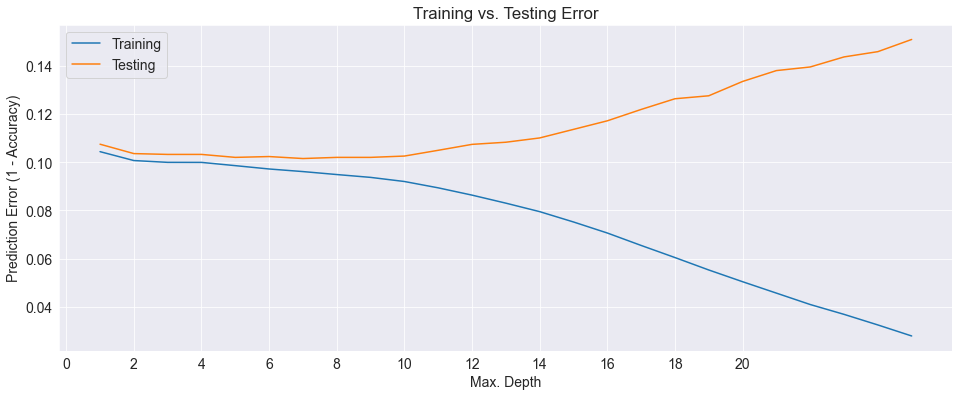

In [103]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Testing Error'])
plt.title('Training vs. Testing Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Testing']);

> From above graph we choose max_deapth criterion for the decision tree as we increase deapth .. the model is over fitting .. to avoid over fitting we take a max deapth of 6.

In [104]:
model = DecisionTreeClassifier(max_depth=6, random_state=42)

In [105]:
model.fit(train_inputs, train_targets)
train_preds = model.predict(train_inputs)

In [106]:
train_probs = model.predict_proba(train_inputs)

In [107]:
model.score(test_inputs, test_targets)

0.8975606413594628

We will use gridsearch to tune multiple parameters at once.

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
params = {
    'max_depth': [2, 3, 5, 10,15, 20],
    'min_samples_leaf': [5, 10, 20, 50,70, 100],
    'criterion': ["gini", "entropy"],
}


In [110]:
model=DecisionTreeClassifier(random_state=42)

In [113]:
model.fit(train_inputs,train_targets)

DecisionTreeClassifier(random_state=42)

In [114]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=params, n_jobs=-1, verbose=1, scoring = "accuracy")

In [115]:
grid_search.fit(train_inputs, train_targets)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 70, 100]},
             scoring='accuracy', verbose=1)

In [116]:
score_df = pd.DataFrame(grid_search.cv_results_)

In [117]:
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.516744,0.049448,0.024219,0.008934,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.901071,0.899443,0.900728,0.898073,0.896788,0.899221,0.001611,38
1,0.524927,0.058917,0.023898,0.008843,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.901071,0.899443,0.900728,0.898073,0.896788,0.899221,0.001611,38
2,0.530225,0.040600,0.034246,0.012488,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.901071,0.899443,0.900728,0.898073,0.896788,0.899221,0.001611,38
3,0.533285,0.083527,0.025342,0.012147,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.901071,0.899443,0.900728,0.898073,0.896788,0.899221,0.001611,38
4,0.494631,0.069541,0.022242,0.001010,gini,2,70,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.901071,0.899443,0.900728,0.898073,0.896788,0.899221,0.001611,38
5,0.517561,0.064743,0.023369,0.004099,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.901071,0.899443,0.900728,0.898073,0.896788,0.899221,0.001611,38
6,0.612099,0.074830,0.024306,0.006571,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.901756,0.900043,0.900642,0.898415,0.897045,0.899580,0.001665,27
7,0.711793,0.180478,0.025235,0.002152,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.901756,0.900043,0.900642,0.898415,0.897045,0.899580,0.001665,27
8,0.816814,0.184456,0.032499,0.006298,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.901413,0.899957,0.900557,0.898073,0.897045,0.899409,0.001613,33
9,0.812306,0.111472,0.025730,0.004004,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.901071,0.899443,0.900728,0.898073,0.896788,0.899221,0.001611,38


**Criterion = Entropy , max_depth = 5 , min_samples_leaf = 50**

In [118]:
model=DecisionTreeClassifier(max_depth=6, random_state=42)

In [123]:
model.fit(train_inputs,train_targets)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [124]:
model.score(test_inputs,test_targets)

0.8975606413594628

In [119]:
model2=DecisionTreeClassifier(criterion = "entropy" , max_depth=6,min_samples_leaf=50)

In [120]:
model2.fit(train_inputs,train_targets)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=50)

In [121]:
model2.score(test_inputs,test_targets)

0.897286556118953

**Max accuracy is obtained at 6 max depth than adding any other parameters**. 

In [125]:
ypred=model.predict(test_inputs)

#### R2 Score :

Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

   **R2= 1- SSres / SStot**
                         
Where,
SSres is the sum of squares of the residual errors.
SStot is the total sum of the errors.

#### Mean Squared Error:

 In Statistics, Mean Square Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

In [126]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [127]:
import math

In [128]:
r2_scor=r2_score(test_targets,ypred)
print(math.sqrt(mean_squared_error(test_targets,ypred)),r2_scor) 

0.32006149196761735 0.07415393813966631


In [129]:
model3=DecisionTreeClassifier(criterion= "entropy",max_depth=5,min_samples_leaf=50, random_state=42)

In [130]:
model3.fit(train_inputs,train_targets)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       random_state=42)

In [131]:
model3.score(test_inputs,test_targets)

0.897286556118953

finally we get decision tree with max_depth 6 has max accuracy

In [132]:
model_final=DecisionTreeClassifier(max_depth=6,random_state=42)

In [133]:
model_final.fit(train_inputs,train_targets)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [134]:
preds = model_final.predict(test_inputs)

In [136]:
pred_series = pd.Series(preds)
test_targets_series = pd.Series(test_targets)
test_targets_series.reset_index(inplace=True , drop=True)
result_df = pd.concat([test_targets_series,pred_series],axis =1)
result_df.rename(columns={0:"predicted"},inplace=True)
result_df

,IsBadBuy,predicted
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
14589,0.0,0.0
14590,0.0,0.0
14591,0.0,1.0
14592,0.0,0.0


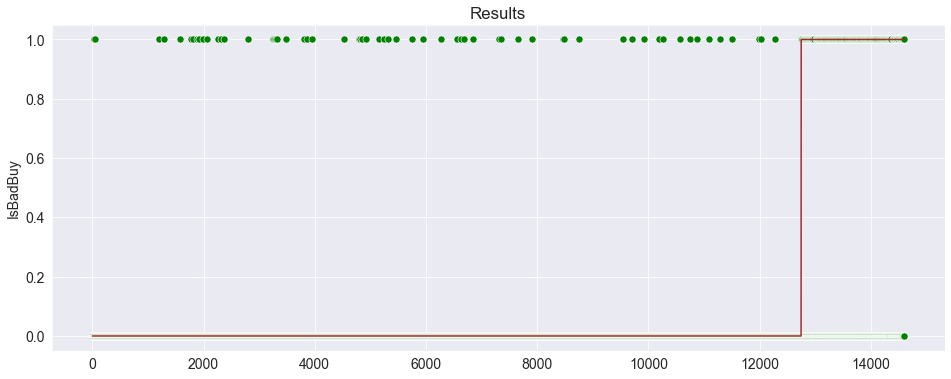

In [137]:
plt.title('Results')
sns.lineplot(y ='IsBadBuy',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'brown')
sns.scatterplot(y ='predicted',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'green', marker = 'o',s=50);

**For a clear view .. lets draw the confusion matrix for this model**

### Confusion Matrix:

“ `A confusion matrix is a performance measurement for machine learning algorithm` ”.It is a summarized table of the number of correct and incorrect predictions (or actual and predicted values) yielded by a classifier (or classification model) for binary classification tasks.

In [138]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

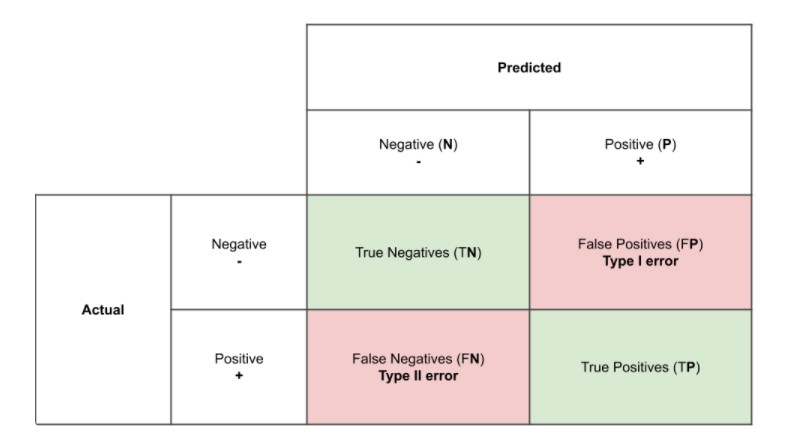

Accuracy: 90.27%


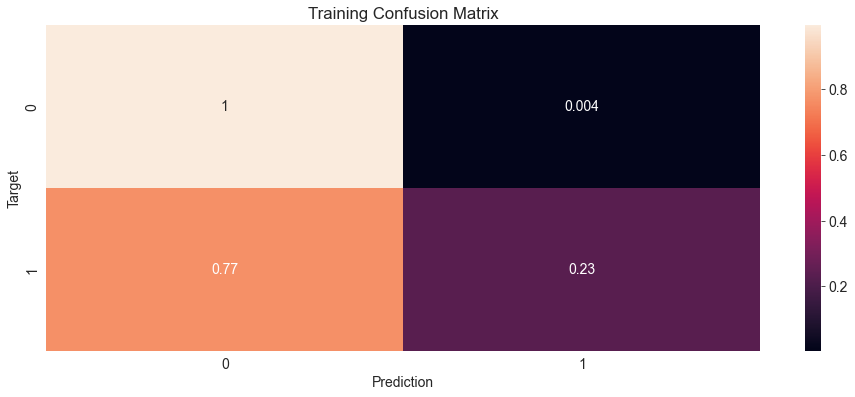

In [139]:
train_preds = predict_and_plot(train_inputs, train_targets, 'Training')

Accuracy: 89.76%


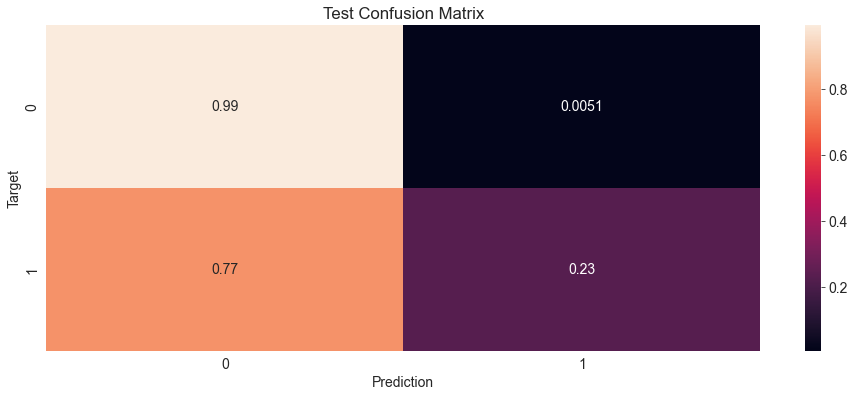

In [140]:
test_preds = predict_and_plot(test_inputs, test_targets, 'Test')

> *This implies the model decision tree has trained to get a training accuracy of `90.79%` and a test accuracy of `89.74%`.*

**Now we check some other model in search of better accuracy.**

## 12. Artificial neural networks - (ANN)

In [141]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

#### chuncks




we have around 62k - 0 and 8k -1 . 
so lets make 10k -0 and 1k -1 random samples for testing 
and make the remaining data of 51k into 3 sets of 17k-0 and concat 7k-1
to form new 3 datasets and build diff models on each , and use the afore mentioned seperated sample to test and the prediction is majority of 3 models 

In [142]:
main_df=train_df.copy()

In [143]:
train_df.shape

(72969, 125)

In [144]:
train_df["IsBadBuy"].value_counts()

0.0    63994
1.0     8975
Name: IsBadBuy, dtype: int64

In [145]:
all0=main_df[main_df["IsBadBuy"]==0]

In [146]:
all1=main_df[main_df["IsBadBuy"]==1]

In [147]:
test1=all1.sample(1975)

while making diff ann models , we prefer to check under sampling with ann . in order to achieve that , we have to split the data into 3 equal parts of majority class and minority class . and its done below , and the data is asved to 3 files named as test_1 , test_2 , test_3 . finally , the models are build according to the files . so if we run these code blocks again ,  they might yield diff data and the that diff data cant make better predictions with the old models we made earlier . we can always make new models and try to improve accuracy

In [ ]:
'''ind=test1.index
for ele in ind :
  all1.drop(ele , inplace=True)'''

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#test0=all0.sample(12994)

In [ ]:
'''ind=test0.index
for ele in ind :
  all0.drop(ele , inplace=True)'''

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#df_test = pd.concat([test0,test1], axis=0)

In [ ]:
#print(all0.shape)
#print(all1.shape)
#print(df_test.shape)

(51000, 125)
(7000, 125)
(14969, 125)


In [ ]:
#test1_0=all0.sample(17000)

In [ ]:
'''ind=test1_0.index
for ele in ind :
  all0.drop(ele , inplace=True)'''

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#df1=pd.concat([test1_0,all1], axis=0)

In [ ]:
#df1.shape

(24000, 125)

In [ ]:
#all0.shape

(34000, 125)

In [ ]:
#test2_0=all0.sample(17000)

In [ ]:
'''ind=test2_0.index
for ele in ind :
  all0.drop(ele , inplace=True)'''

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#df2=pd.concat([test2_0,all1], axis=0)

In [ ]:
#all0.shape 

(17000, 125)

In [ ]:
#df3=pd.concat([all0,all1],axis=0)

In [ ]:
#print(df1.shape)
#print(df2.shape)
#print(df3.shape)
#print(df_test.shape)

(24000, 125)
(24000, 125)
(24000, 125)
(14969, 125)


In [ ]:
#df1.to_csv("test_1.csv")

In [ ]:
'''df2.to_csv("test_2.csv")
df3.to_csv("test_3.csv")
df_test.to_csv("model_verif.csv")

the data for diff models are made and saved to drive by appending the files to drive 

In [ ]:
train1_df=pd.read_csv('test_1.csv')
train2_df = pd.read_csv('test_2.csv')
train3_df = pd.read_csv('test_3.csv')
mod_df = pd.read_csv('model_verif.csv')

we will use these dataframes to train under sampled models later 

In [ ]:
train1_df.drop("Unnamed: 0",axis=1,inplace=True)
mod_df.drop("Unnamed: 0",axis=1,inplace=True)
train2_df.drop("Unnamed: 0",axis=1,inplace=True)
train3_df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
input_cols = list(train1_df.columns)[1:]
target_col = 'IsBadBuy'

In [ ]:
x = train1_df[input_cols].copy()
y = train1_df[target_col].copy()

In [ ]:
real_test = mod_df[input_cols].copy()
real_targ = mod_df[target_col].copy()

### ANN - 4 HIDDEN LAYERS

In [ ]:
import tensorflow as tf
import datetime
from tensorflow import keras

the tensor board is used to plot the trend of the accuracy and error with epochs . 

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


the below code cell gives a function to save our model which can be reloaded 

In [ ]:
import keras

class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch >=0:  # or save after some epoch, each k-th epoch etc.
            self.model.save("model_{}.hd6".format(epoch))

In [ ]:
saver = CustomSaver()

In [ ]:
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Dense(124, input_shape=(124,), activation='relu'),
    tf.keras.layers.Dense(62, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(30, activation='relu'),
    #tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(30, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
from pandas.core.common import random_state
model = create_model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])  
model.optimizer.learning_rate = 0.00001

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

'''model.fit(x, 
          y, 
          epochs=250,
          callbacks=[saver],
          validation_data=(real_test,real_targ),
          #callbacks=[tensorboard_callback]
          )'''

after runnig through epochs , we found models with highest accuracy among their restictions , and saved the models to drive .

we can use the below line to plot that trends said above 

In [ ]:
#%tensorboard --logdir logs/fit

the below line hepls us to retrieve the model by mentioning the path to the saved file 

In [ ]:
model4= tf.keras.models.load_model('/content/drive/MyDrive/model_4hiddfol.hd6')

While splitting the data,we created the model_verif.csv to validate our model.  

In [ ]:
#plotting preds , targets 
pred_series = pd.Series(ypreds)
test_targets_series = pd.Series(real_targ)
test_targets_series.reset_index(inplace=True , drop=True)
result_df = pd.concat([test_targets_series,pred_series],axis =1)
result_df.rename(columns={0:"predicted"},inplace=True)
result_df

In [ ]:
plt.title('Results')
sns.lineplot(y ='IsBadBuy',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'brown')
sns.scatterplot(y ='predicted',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'green', marker = 'o',s=50);

In [ ]:
ypreds = np.round(ypreds)

In [ ]:
print(math.sqrt(mean_squared_error(real_targ,ypreds)))
print(r2_score(real_targ,ypreds))

### ANN - 3 Hidden layers with drop-out  regularization

In [ ]:
def create_model3():
  return tf.keras.models.Sequential([
    tf.keras.layers.Dense(124, input_shape=(124,), activation='relu'),
    tf.keras.layers.Dense(62, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
from pandas.core.common import random_state
model3 = create_model3()
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])  
model3.optimizer.learning_rate = 0.00001

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

'''model3.fit(x, 
          y, 
          epochs=250,
          callbacks=[saver],
          validation_data=(real_test,real_targ),
          #callbacks=[tensorboard_callback]
          )'''

In [ ]:
#%tensorboard --logdir logs/fit

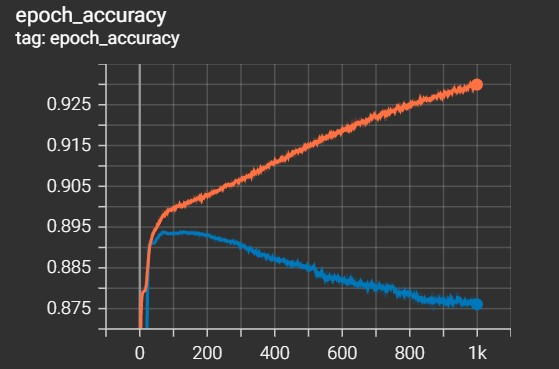

upon plotting with tensorboard , the accuracy of training data is on red line and testing on blue line .

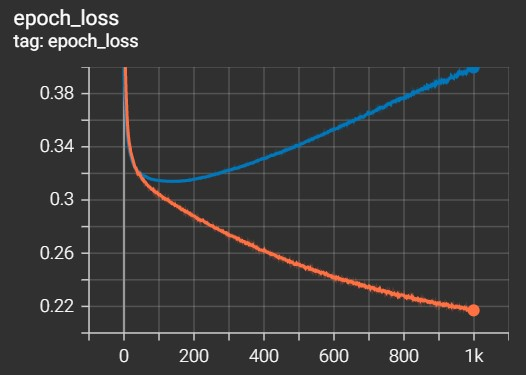

the loss of the same is plotted 

### For smooth running of loading process the folder must be uploaded as whole.

In [ ]:
model3= tf.keras.models.load_model('/content/drive/MyDrive/model_27.hd6')

In [ ]:
#plotting preds , targets
pred_series = pd.Series(yypreds)
test_targets_series = pd.Series(real_targ)
test_targets_series.reset_index(inplace=True , drop=True)
result_df = pd.concat([test_targets_series,pred_series],axis =1)
result_df.rename(columns={0:"predicted"},inplace=True)
result_df

In [ ]:
plt.title('Results')
sns.lineplot(y ='IsBadBuy',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'brown')
sns.scatterplot(y ='predicted',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'green', marker = 'o',s=50);

In [ ]:
yypreds= model3.predict(real_test)
yypreds = np.round(yypreds)

In [ ]:
print(math.sqrt(mean_squared_error(real_targ,yypreds)))
print(r2_score(real_targ,yypreds))

we can have many number of hidden layers we want . there is no prof that says the accuracy increases with layers . the results we obtained by increasing layers proves the same . hence we use 2 hidden layers just to reduce the weights to be calculated 

### ANN - 2 hidden layers NO drop_out

In [ ]:
def create_model2():
  return tf.keras.models.Sequential([
    tf.keras.layers.Dense(124, input_shape=(124,), activation='relu'),
    tf.keras.layers.Dense(62, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
from pandas.core.common import random_state
model2 = create_model2()
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])  
model2.optimizer.learning_rate = 0.00001

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

'''model2.fit(x, 
          y, 
          epochs=250,
          callbacks=[saver],
          validation_data=(real_test,real_targ),
          #callbacks=[tensorboard_callback]
          )'''

In [ ]:
#%tensorboard --logdir logs/fit

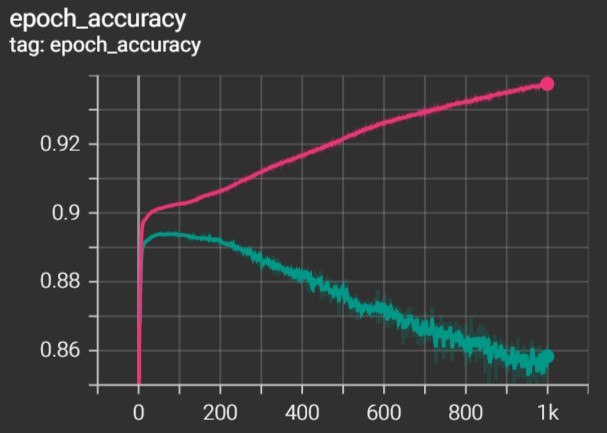

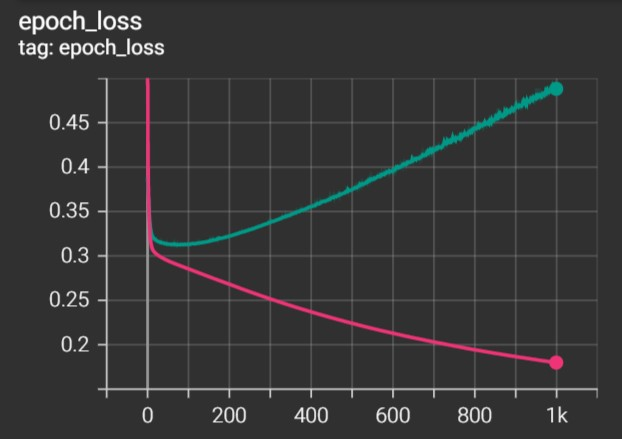

In [ ]:
model2= tf.keras.models.load_model('/content/drive/MyDrive/model_10.hd6')

In [ ]:
#plotting pred and test accuracy 
pred_series = pd.Series(y_preds)
test_targets_series = pd.Series(real_targ)
test_targets_series.reset_index(inplace=True , drop=True)
result_df = pd.concat([test_targets_series,pred_series],axis =1)
result_df.rename(columns={0:"predicted"},inplace=True)
result_df

In [ ]:
plt.title('Results')
sns.lineplot(y ='IsBadBuy',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'brown')
sns.scatterplot(y ='predicted',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'green', marker = 'o',s=50);

In [ ]:
y_preds= model2.predict(real_test)
y_preds = np.round(y_preds)

In [ ]:
print(math.sqrt(mean_squared_error(real_targ,y_preds)))
print(r2_score(real_targ,y_preds))

#### ANN - 2 HIDDEN LAYERS WITH DROP_OUT

In [ ]:
def create_model2d():
  return tf.keras.models.Sequential([
    tf.keras.layers.Dense(124, input_shape=(124,), activation='relu'),
    tf.keras.layers.Dense(62, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(30, activation='relu'), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
from pandas.core.common import random_state
model2d = create_model2d()
model2d.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])  
model2d.optimizer.learning_rate = 0.00001

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

'''model2d.fit(x, 
          y, 
          epochs=250,
          callbacks=[saver],
          validation_data=(real_test,real_targ),
          #callbacks=[tensorboard_callback]
          )'''

In [ ]:
#%tensorboard --logdir logs/fit

In [ ]:
model2d= tf.keras.models.load_model('/content/drive/MyDrive/model_7.hd6')

In [ ]:
#plot
pred_series = pd.Series(yy_preds)
test_targets_series = pd.Series(real_targ)
test_targets_series.reset_index(inplace=True , drop=True)
result_df = pd.concat([test_targets_series,pred_series],axis =1)
result_df.rename(columns={0:"predicted"},inplace=True)
result_df

In [ ]:
plt.title('Results')
sns.lineplot(y ='IsBadBuy',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'brown')
sns.scatterplot(y ='predicted',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'green', marker = 'o',s=50);

In [ ]:
yy_preds= model2d.predict(real_test)
yy_preds = np.round(yy_preds)

In [ ]:
print(math.sqrt(mean_squared_error(real_targ,yy_preds)))
print(r2_score(real_targ,yy_preds))

The data seems to be un-balanced . to increase the weights for minority class , we can use 3 technique under-sampling+ensembling , traditional oversampling , smote (over sampling)

### ANN - Using SMOTE over-sampling technique 2 hidden layers and drop-out

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

In [ ]:
def create_modelSd():
  return tf.keras.models.Sequential([
    tf.keras.layers.Dense(124, input_shape=(124,), activation='relu'),
    tf.keras.layers.Dense(62, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
from pandas.core.common import random_state
modelSd = create_modelSd()
modelSd.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])  
modelSd.optimizer.learning_rate = 0.00001

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

'''modelSd.fit(X_sm, 
          y_sm, 
          epochs=500,
          callbacks=[saver],
          validation_data=(real_test,real_targ),
          #callbacks=[tensorboard_callback]
          )'''

In [ ]:
#modelSd= tf.keras.models.load_model('/content/drive/MyDrive/SMOTEdropout.hd6')

In [ ]:
#plots
pred_series = pd.Series(ys_preds)
test_targets_series = pd.Series(real_targ)
test_targets_series.reset_index(inplace=True , drop=True)
result_df = pd.concat([test_targets_series,pred_series],axis =1)
result_df.rename(columns={0:"predicted"},inplace=True)
result_df

In [ ]:
plt.title('Results')
sns.lineplot(y ='IsBadBuy',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'brown')
sns.scatterplot(y ='predicted',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'green', marker = 'o',s=50);

In [ ]:
ys_preds= model2d.predict(real_test)
ys_preds = np.round(ys_preds)

In [ ]:
print(math.sqrt(mean_squared_error(real_targ,ys_preds)))
print(r2_score(real_targ,ys_preds))

### ANN - SMOTE 2 hidden layers NO drop_out

In [ ]:
def create_modelS():
  return tf.keras.models.Sequential([
    tf.keras.layers.Dense(124, input_shape=(124,), activation='relu'),
    tf.keras.layers.Dense(62, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
from pandas.core.common import random_state
modelS = create_modelS()
modelS.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])  
modelS.optimizer.learning_rate = 0.00001

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

'''modelS.fit(X_sm, 
          y_sm, 
          epochs=500,
          callbacks=[saver],
          validation_data=(real_test,real_targ),
          #callbacks=[tensorboard_callback]
          )'''

In [ ]:
#modelS= tf.keras.models.load_model('/content/drive/MyDrive/SMOTEwithoutDropout.hd6')

In [ ]:
#plot
pred_series = pd.Series(ysd_preds)
test_targets_series = pd.Series(real_targ)
test_targets_series.reset_index(inplace=True , drop=True)
result_df = pd.concat([test_targets_series,pred_series],axis =1)
result_df.rename(columns={0:"predicted"},inplace=True)
result_df

In [ ]:
plt.title('Results')
sns.lineplot(y ='IsBadBuy',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'brown')
sns.scatterplot(y ='predicted',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'green', marker = 'o',s=50);

In [ ]:
ysd_preds= modelS.predict(real_test)
ysd_preds = np.round(ysd_preds)

In [ ]:
print(math.sqrt(mean_squared_error(real_targ,ysd_preds)))
print(r2_score(real_targ,ysd_preds))

### ANN -  Under sampling + Ensembling

In [ ]:
def create_modelu():
  return tf.keras.models.Sequential([
    tf.keras.layers.Dense(124, input_shape=(124,), activation='relu'),
    tf.keras.layers.Dense(62, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
from pandas.core.common import random_state
modelu = create_modelu()
modelu.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])  
modelu.optimizer.learning_rate = 0.00001

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

'''modelu.fit(inputs, 
          targets, 
          epochs=500,
          callbacks=[saver],
          validation_data=(real_test,real_targ),
          #callbacks=[tensorboard_callback]
          )'''

the models for each of 3 data sets ia made and stored to drive 

In [ ]:
model_test1= tf.keras.models.load_model('/content/drive/MyDrive/model_test_1.hd5')
model_test2 = tf.keras.models.load_model('/content/drive/MyDrive/model_test_2.hd6')
model_test3 = tf.keras.models.load_model('/content/drive/MyDrive/model_test_3.hd6')

In [ ]:
yp1=model_test1.predict(real_test)
yp2= model_test2.predict(real_test)
yp3=model_test3.predict(real_test)

In [ ]:
yp1 = np.round(yp1)
yp2 = np.round(yp2)
yp3 = np.round(yp3)

In [ ]:
y_pred_final = yp1.copy()
for i in range(len(yp1)):
    n_ones = yp1[i] + yp2[i] + yp3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [ ]:
r2_scor=r2_score(real_targ,y_pred_final)
print(math.sqrt(mean_squared_error(real_targ,y_pred_final)),r2_scor)

0.3478266315598707 -0.05633404317085011


In [ ]:
#plot
pred_series = pd.Series(y_pred_final)
test_targets_series = pd.Series(real_targ)
test_targets_series.reset_index(inplace=True , drop=True)
result_df = pd.concat([test_targets_series,pred_series],axis =1)
result_df.rename(columns={0:"predicted"},inplace=True)
result_df

In [ ]:
plt.title('Results')
sns.lineplot(y ='IsBadBuy',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'brown')
sns.scatterplot(y ='predicted',x=result_df.index,data= result_df.sort_values(by = 'IsBadBuy'),color = 'green', marker = 'o',s=50);

**The files :-**

* model_4hiddfol.hd6 -- with 4 hidden layers and no drop_out

* model_10.hd6 -- with 2 hidden layes no drop_out

* model_7.hd6 -- with 2 hidden layers and drop_out

* model_27.hd6 -- with 3 hidden layers and drop_out

* model_test_1 -- with 2 hidden layers drop_out for test_1

* model_test_2 -- with 2 hidden layers drop_out for test_2

* model_test_3 -- with 2 hidden layers drop_out for test_3


## 13. Model - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_RF = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model_RF.fit(train_inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model_RF.score(train_inputs, train_targets)

0.999948608137045

In [ ]:
model_RF.score(test_inputs, test_targets)

0.8993650358594857

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model_RF.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 89.94%


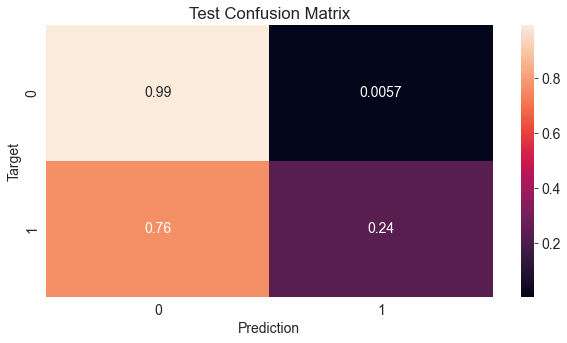

In [ ]:
test_preds = predict_and_plot(test_inputs, test_targets, 'Test')

In [ ]:
train_probs = model_RF.predict_proba(X_train)

In [ ]:
train_probs

array([[0.99, 0.01],
       [0.32, 0.68],
       [0.98, 0.02],
       ...,
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01]])

> Seems like the model Random Forest was trained to get a training accuracy of `99%` and a test accuracy of `89%`. Much better than decision tree model. Now let's tune the parameters to get better testing accuracy.

### Tuning Random Forest tree-count

In [ ]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(train_inputs, train_targets)

In [ ]:
base_train_acc = base_model.score(train_inputs, train_targets)
base_test_acc = base_model.score(test_inputs, test_targets)

In [ ]:
base_accs = base_train_acc, base_test_acc
base_accs

(0.999948608137045, 0.8983828970809922)

> *Just a base model gave pretty good predictions ... so lets try to tune one or two parameters*

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [ ]:
model.fit(train_inputs, train_targets)
model.score(train_inputs, train_targets), model.score(test_inputs, test_targets)

(0.9828889149927562, 0.8962587364670412)

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=50)

In [ ]:
model.fit(X_train, train_targets)
model.score(train_inputs, train_targets), model.score(test_inputs, test_targets)

(0.9994126629860214, 0.8985884610113746)

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)

In [ ]:
model.fit(train_inputs, train_targets)
model.score(train_inputs, train_targets), model.score(test_inputs, test_targets)

(0.9999804220995341, 0.8993650358594857)

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [ ]:
model.fit(train_inputs, train_targets)
model.score(train_inputs, train_targets), model.score(test_inputs, test_targets)

(1.0, 0.8996391210999954)

In [ ]:
model_rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=300)

In [ ]:
model_rf.fit(train_inputs, train_targets)
model_rf.score(train_inputs, train_targets), model_rf.score(test_inputs, test_targets)

(1.0, 0.8985199397012471)

In [ ]:
model_rf.fit(train_inputs,train_targets)

In [ ]:
ypred=model_rf.predict(test_inputs)

In [ ]:
r2_scor=r2_score(test_targets,ypred)
print(math.sqrt(mean_squared_error(test_targets,ypred)),r2_scor) 

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=400)

In [ ]:
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_test, test_targets)

(1.0, 0.8996391210999954)

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 89.96%


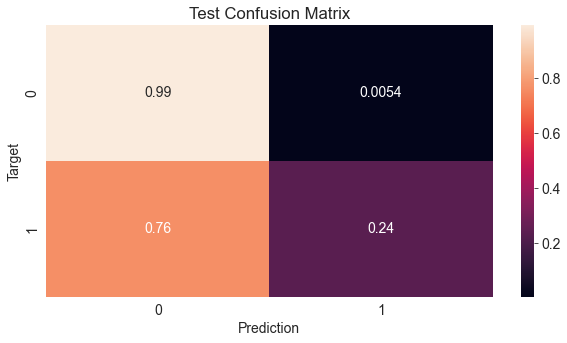

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

**The model made great predictions with n_estimators = 200**

### Tuning max deapth

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [ ]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=300, **params).fit(train_inputs, train_targets)
    return model.score(train_inputs, train_targets), model.score(test_inputs, test_targets)

In [ ]:
test_params(max_depth=1)

(0.8779905242961745, 0.8746973642136038)

In [ ]:
test_params(max_depth=5)

(0.878617017111085, 0.8754282581882966)

In [ ]:
test_params(max_depth=10)

(0.9028348799874701, 0.8980859714037732)

In [ ]:
test_params(max_depth=15)

(0.9080426015114139, 0.8998218445936687)

In [ ]:
test_params(max_depth=20)

(0.9211648822269807, 0.8989310675620118)

In [ ]:
test_params(max_depth=25)

(0.945678800856531, 0.898656982321502)

In [ ]:
test_params(max_depth=30)

(0.9791349036402569, 0.8988625462518843)

In [ ]:
test_params(max_depth=31)

(0.98403426124197, 0.8989995888721393)

> **The model with 300 estimators and max deapth of 30 gives good predictions .. but less than we can achive without tuning deapth and 300 estimators**

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=300)

In [ ]:
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_test, test_targets)

(1.0, 0.8989995888721393)

## 14. Model - K-Nearest Neighbours (KNN)

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
model=KNeighborsClassifier(n_neighbors=5)

In [157]:
model.fit(train_inputs,train_targets)

KNeighborsClassifier()

In [159]:
model.score(test_inputs,test_targets)

0.8822118678909141

In [161]:
def nearest_neighbour_error(nei):
    model = KNeighborsClassifier(n_neighbors=nei)
    model.fit(train_inputs, train_targets)
    train_acc = 1 - model.score(train_inputs, train_targets)
    test_acc = 1 - model.score(test_inputs, test_targets)
    return {'neighbours': nei, 'Training Error': train_acc, 'Testing Error': test_acc}

In [162]:
errors_df = pd.DataFrame([nearest_neighbour_error(nei) for nei in range(1, 20)]) 

In [ ]:
errors_df

,neighbours,Training Error,Testing Error
0,1,0.000000,0.169864
1,2,0.087777,0.124572
2,3,0.084043,0.132041
3,4,0.097919,0.115938
4,5,0.094972,0.117788
5,6,0.101156,0.112992
6,7,0.099101,0.112238
7,8,0.102407,0.111484
8,9,0.100471,0.110388
9,10,0.103332,0.111142


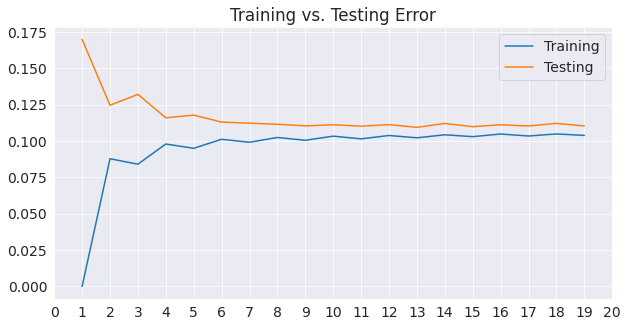

In [163]:
plt.figure()
plt.plot(errors_df['neighbours'], errors_df['Training Error'])
plt.plot(errors_df["neighbours"], errors_df['Testing Error'])
plt.title('Training vs. Testing Error')
plt.xticks(range(0,21))
plt.legend(['Training', 'Testing']);

> Taking a look at above graph .. we choose a neighbour of count 12

In [ ]:
model=KNeighborsClassifier(n_neighbors=12)

In [ ]:
model.fit(train_inputs, train_targets)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
model.score(test_inputs, test_targets)

0.8887899136631492

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 88.88%


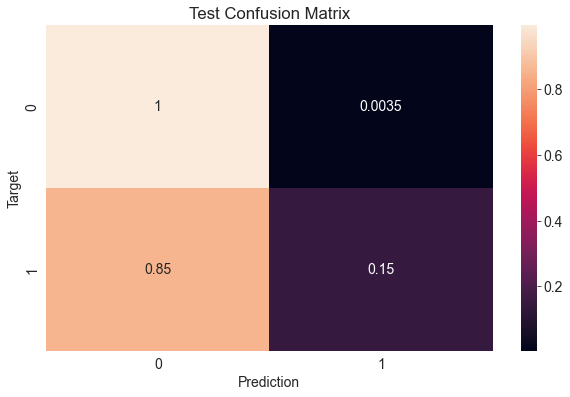

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

> KNN has taken long time to calculate testing and training errors. This is a mojor drawback of knn model.

## 15. Model - Logistic regression


This model takes the linear combination of inputs and applies `sigmoid function`.
**Sigmoid Function**:

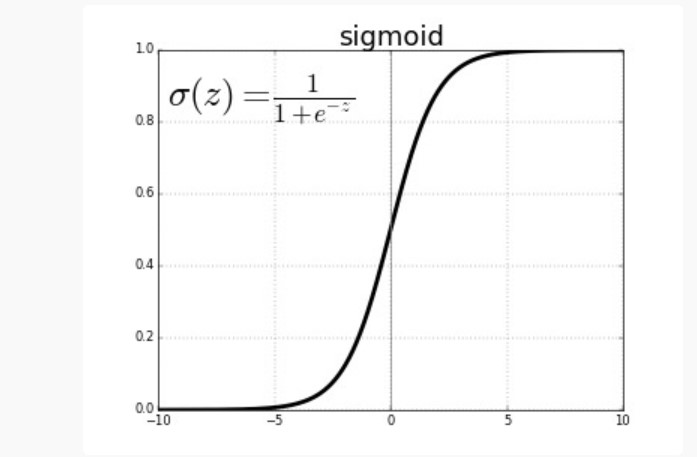

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_inputs[req_col + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
X_train = train_inputs[req_col + encoded_cols]
X_test = test_inputs[req_col + encoded_cols]

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.8968244645444222

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
r2_scor=r2_score(test_targets,test_preds)
print(math.sqrt(mean_squared_error(test_targets,test_preds)),r2_scor)

0.3258957359302925 0.030965293580918263


In [ ]:
accuracy_score(test_targets, test_preds)

0.8929011922707962

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
jovian.commit()

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 89.68%


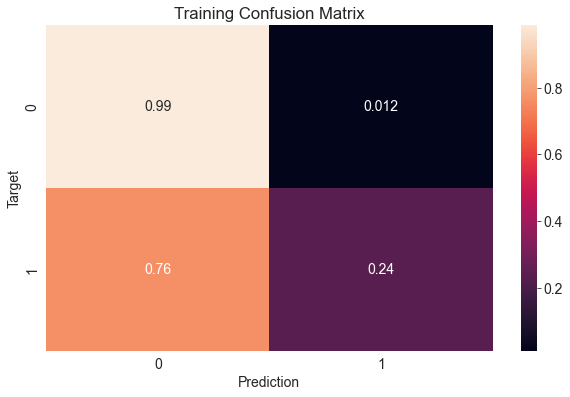

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 89.29%


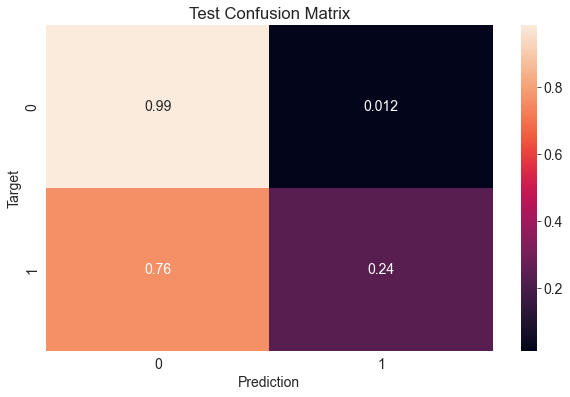

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [ ]:
test_targets.value_counts()

0.0    12745
1.0     1849
Name: IsBadBuy, dtype: int64

> Always predicting no to test data will give 87.33% accuracy .. and this logistic regression model makes a accuracy of 89.28%.

In [ ]:
accuracy = [89.73,89.899,89.88,89.28]
model = ['Decesion tree','Random Forest','knn','Logistic Regression']

accuracy_data = {
    'Model' : model,
    'Accuracy' : accuracy
}

accuracy_df = pd.DataFrame(accuracy_data)
accuracy_df

*Random forest has maximum accuracy followed by knn with a minute difference. But, KNN has taken long time to calculate testing and training errors. This is a mojor drawback of knn model.*

###  16. This implies that Random Forest model has got the best accuracy out of all four models.

# Summary

   The main aim  of the project is to design a model with best possible accuracy which distingushes whether the purchased old car is a good nuy or not (Output parameters) based on Conditions and features of the car (Input parameters).
   
### Step - 1: Installing and   importing libraries:

* Numpy
* Pandas
* Matplotlib
* Seaborn
* Scikit-learn (sklearn)

### Step - 2: Data Description:

   We have got information about number of rows, columns, datatypes of each column and number of non null values uing `info()`
   method from `pandas`.

### Step - 3: Analysis and Visualization of Data:
  
   Here some columns are dropped which contains IDs or some type of serial numbers(example RefId,
PurchDate, BYRNO, etc..). These columns which don't or least effect on target column are dropped. We get these columns from `cor-relation` table. Some other columns which have maximum number of null values are also dropped from the dataset.
   
   Now to get a clear picture of data several visualizations were plotted using `Seaborn` and submodule `pyplot` of `matplotlib`.
   
### Step - 4: Splitting the data into numerical and categorical columns :

   The dataset is splitted into Numeric and Categorical columns.
   
### Step - 5: Handling Numeric and Categorical columns
    
#### i) Handling Numeric Columns:

    a)Imputation :
     
   This is a technique of filling the missing values with suitable substitute. To do this we have imported `SimpleImputer` class  from `sklearn.impute` module and we have choosen `mean` of the respective columns to fill in corresponding missing or Nan values.
   
    b)Scaling Numeric Features:
    
   Since the parameters will be in different ranges, scaling is done so that one parameter doesn't effect other parameter. For doing this we imported `MinMaxScaler` class from `sklearn.preprocessing` is used to scale values to `(0,1)` range.
   
   *MinMaxScaler Formula*:
   
   (Each value of column - Minumum of respective column)/(Maximum - minimum)of respective columns = (xi - min(x))/(max(x)-min(x))


#### ii) Encoding categorical Columns:

   We have imported `OneHotEncoding` class from `sklearn.preprocessing` module. It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains '0' or '1' corresponding to which columnit has been placed. After encoding, the number of columns have increased to 135 from 23.
   
### Step - 6: Data Splitting

   Here the data is splitted into twp portions, one is to develop a predictive model and the other to evaluate the model's performance. For doing this we have imported `test_train_split` from `sklearn.model_selection`
 module and splitted the dataset with `test_size of 0.2` and random state = 42.
 
   And then we split into input columns and target columns of corresponding datasets.
   
### Step - 7: Training and Testing models
   The preprocessed data is now used to train several models and accuracy is recorded.
   
   **Model 1 - Decision Tree**:
        
        Test accuracy - 82% (before tuning)
        Test accuracy - 89.74% (after tuning the max depth)
        
   A max depth of 6 is choosen since the model has started to overfit From a max depth of 6.
   
   **Model 2 - Artificial Neural Networks(ANN) **
   
   
   **Model 3 - Random Forest**
           
         Test accuracy - 89.84% (before tuning)
         Test accuracy - 89.87% (after tuning the tree count)
         Test accuracy - 89.89% (after tuning max depth and estimators)
      
   **Model 4 - K-Nearest Neighbours (KNN)**
       
         Test accuracy - 88.88% 
       
   **Model 5 - Logistic regression**
   
         Test accuracy - 89.29%
         
   > Based on above recordings, Random forest with 200 estimamtors and max depth of 20 has better accuracy compared to other models.

## References and Future work:

> The dataset has been taken from kaggle datasets : <a> "https://www.kaggle.com/c/DontGetKicked/data" </a>

* Further efforts can be made to avoid overfitting so as to generalize the model to work with other real world datasets.
* Reduce the time taken to calculate test errors in knn model.

